# criando Os Nomes

In [1]:
import pandas as pd
import seaborn as sns

## Importando os dados em json 


In [2]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')


In [3]:
print(f'Quantidade de nomes : {len(nomes_f)+nomes_m.shape[0]}') # Dois metodos diferentes de encontrar a quantidade de dados

Quantidade de nomes : 400


In [4]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [5]:

nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


## Juntando os dois dataFrames


In [6]:
frames = [nomes_f, nomes_m]

In [7]:
nomes = pd.concat(frames)['nome'].to_frame() # escolhendo apenas quais informações eu quero concatenar

In [8]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [9]:
nomes.sample(5) # sample pega nomes aleatorios

,nome
45,ADRIANO
116,DOMINGOS
135,ROSILENE
64,VIVIANE
174,DENIS


# Incluindo Id dos Alunos

### Criando ids aleatorios

In [10]:
import numpy as np 
np.random.seed(123)

In [11]:
total_alunos = nomes.shape[0]
total_alunos

400

In [12]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [13]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


### Criando email

In [14]:
dominios = ['@dominiodoemail.com.br','@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios,total_alunos)
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@dominiodoemail.com.br


In [15]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower() # Concatetando 
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@dominiodoemail.com.br,severino@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br,iago@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br


# Criando a Tabela Cursos

### Buscando informações na web

In [16]:
import html5lib 
import lxml

In [17]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [18]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [19]:
type(cursos)

list

In [20]:
cursos = cursos[0] # Transformando eu um dataFrame 

In [21]:
type(cursos)

pandas.core.frame.DataFrame

In [22]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando O Index de cursos

In [23]:
cursos = cursos.rename(columns={'Nome do curso':'nome_do_curso' }) # renomenado colunas

In [24]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [25]:
cursos['id'] = cursos.index +1

In [26]:
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [27]:
cursos = cursos.set_index('id') # colocando o index para o id

In [28]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [29]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


In [30]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) *1.5).astype(int) # ceil maior que zero. exponential faz com que quanto maior menos pessoas matriculadas em varios cursos. astype coloca o tipo 

In [31]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,2
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
10,LUIS,125,@dominiodoemail.com.br,luis@dominiodoemail.com.br,2
139,OSMAR,71,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2


In [32]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

<AxesSubplot:xlabel='matriculas', ylabel='Density'>

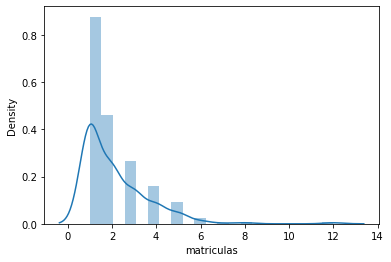

In [33]:
sns.distplot(nomes.matriculas)

In [34]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

In [35]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
103,MAICON,295,@servicodoemail.com,maicon@servicodoemail.com,4
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,5
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br,1
41,CLAUDIO,204,@servicodoemail.com,claudio@servicodoemail.com,1


# Selecionando Cursos 

In [36]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,2
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,4
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,5


In [37]:
total_matriculas = []
x = np.random.rand(20) 
prob = x / sum(x)

In [38]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id,np.random.choice(cursos.index, p = prob)]
        total_matriculas.append(mat)

matriculas = pd.DataFrame(total_matriculas, columns =['id_aluno','id_curso'] )

In [39]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,43,16
2,304,6
3,304,11
4,304,12


In [40]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos' })

In [41]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
142,HUGO,378,@servicodoemail.com,hugo@servicodoemail.com,1
150,EDMILSON,326,@dominiodoemail.com.br,edmilson@dominiodoemail.com.br,1
161,DAMIAO,349,@servicodoemail.com,damiao@servicodoemail.com,4


In [42]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [43]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,43,16
2,304,6
3,304,11
4,304,12


In [44]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,58,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,74,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


# Saída em diferentes formatos

In [45]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,58,Lógica de programação
2,31,Java para Web
3,53,C# para Web


In [46]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv',index = False)

In [47]:
pd.read_csv('matriculas_por_curso.csv').head(3)

,quantidade_de_alunos,nome_do_curso
0,58,Lógica de programação
1,31,Java para Web
2,53,C# para Web


In [48]:
matriculas_json = matriculas_por_curso.to_json()

In [49]:
matriculas_json 

'{"quantidade_de_alunos":{"1":58,"2":31,"3":53,"4":4,"5":12,"6":74,"7":32,"8":18,"9":59,"10":39,"11":61,"12":65,"13":14,"14":27,"15":46,"16":43,"17":56,"18":53,"19":74,"20":35},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [50]:
matriculas_html = matriculas_por_curso.to_html()

In [51]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>58</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>74</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
 

# Criando o banco SQL

In [52]:
from sqlalchemy import create_engine, MetaData, Table 

In [53]:
engine = create_engine('sqlite:///:memory:')

In [54]:
engine

Engine(sqlite:///:memory:)

In [55]:
type(engine)

sqlalchemy.engine.base.Engine

In [56]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,58,Lógica de programação
2,31,Java para Web
3,53,C# para Web


In [57]:
matriculas_por_curso.to_sql('matriculas',engine)

In [58]:
print(engine.table_names())

['matriculas']


## Buscando no banco de dados local

In [59]:
query = 'Select * from matriculas where quantidade_de_alunos < 20'  

In [60]:
pd.read_sql(query,engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,5,12,Cursos de Python
2,8,18,Novas integrações com Java
3,13,14,Persistência com .NET


In [61]:
pd.read_sql_table('matriculas',engine,columns=['nome_do_curso','quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,58
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,74
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,39


In [62]:
muitas_matriculas = pd.read_sql_table('matriculas',engine,columns=['nome_do_curso','quantidade_de_alunos'])

In [63]:
muitas_matriculas.query('quantidade_de_alunos > 65')

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,74
18,Boas práticas em Java,74


# Escrevendo no bando

In [64]:
muitas_matriculas.query('quantidade_de_alunos > 65').to_sql('muitas_matriculas',con=engine)

In [65]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [66]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,58,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,74,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [67]:
matriculas

,id_aluno,id_curso
0,235,6
1,43,16
2,304,6
3,304,11
4,304,12
...,...,...
849,323,10
850,323,3
851,383,6
852,366,3


In [68]:
id_curso = 6 
proxima_turma = matriculas.query(f'id_curso =={id_curso} ')
proxima_turma

,id_aluno,id_curso
0,235,6
2,304,6
16,55,6
17,288,6
24,218,6
...,...,...
803,340,6
817,127,6
838,18,6
839,18,6


In [69]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
58,ALESSANDRA,193,@servicodoemail.com,alessandra@servicodoemail.com,1
61,BIANCA,21,@servicodoemail.com,bianca@servicodoemail.com,3
178,DENILSON,335,@servicodoemail.com,denilson@servicodoemail.com,4


In [70]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno')) # juntando duas tabelas

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
5,6,SEVERINA,@dominiodoemail.com.br,severina@dominiodoemail.com.br,1
8,6,IRACI,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
10,6,MARIANA,@servicodoemail.com,mariana@servicodoemail.com,4
18,6,ODAIR,@dominiodoemail.com.br,odair@dominiodoemail.com.br,3
18,6,ODAIR,@dominiodoemail.com.br,odair@dominiodoemail.com.br,3
...,...,...,...,...,...
363,6,SILVIO,@dominiodoemail.com.br,silvio@dominiodoemail.com.br,4
363,6,SILVIO,@dominiodoemail.com.br,silvio@dominiodoemail.com.br,4
369,6,POLIANA,@servicodoemail.com,poliana@servicodoemail.com,1


In [71]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'] 

id_aluno
5      SEVERINA
8         IRACI
10      MARIANA
18        ODAIR
18        ODAIR
         ...   
363      SILVIO
363      SILVIO
369     POLIANA
383      ALVARO
397      LILIAN
Name: nome, Length: 74, dtype: object

In [72]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [73]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    PHP com MySql
Name: 6, dtype: object

In [74]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'PHP com MySql'

In [78]:
proxima_turma.rename(columns = {'nome':f'Alunos do curso de {nome_curso}'})

,Alunos do curso de PHP com MySql
id_aluno,
5,SEVERINA
8,IRACI
10,MARIANA
18,ODAIR
18,ODAIR
...,...
363,SILVIO
363,SILVIO
369,POLIANA


In [79]:
proxima_turma = proxima_turma.rename(columns = {'nome':f'Alunos do curso de {nome_curso}'})

# Excel

In [80]:
proxima_turma.to_excel('proxima_turma.xlsx', index= False)

In [81]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de PHP com MySql
0,SEVERINA
1,IRACI
2,MARIANA
3,ODAIR
4,ODAIR
...,...
69,SILVIO
70,SILVIO
71,POLIANA
72,ALVARO
